### Twitter Analysis for # IND VS AUS which was trending No.1 in HYD

In [47]:
# loading from tweets.json
# adding all data, run this before any snippet
import json
import re
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

all_tweets=[]
tweet_text=""
all_hashtags=set()
top_langs=[]
top_langs_numbers=[]
lang=set()
verified=0
langs={}
with open("./tweets.json") as f:
    all_tweets.clear()
    count=0
    for jsonstring in f:
        jsonobj = json.loads(jsonstring)
        dict={}
        dict['text']=jsonobj['text']
        tweet_text= tweet_text + ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",jsonobj['text']).split())
        dict['clean_text']=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",dict['text']).split())
        dict['devices']=jsonobj['source']
        dict['in_reply_to_status_id']=jsonobj['in_reply_to_status_id']
        dict['verified']=jsonobj['user']['verified']
        lang= jsonobj['lang']
        if lang != "und":
            if lang in langs:
                langs[lang]+=1
            else:
                langs[lang]=1
        if dict['verified']== True:
            verified+=1
        dict['followers_count']=jsonobj['user']['followers_count']
        dict['listed_count']=jsonobj['user']['listed_count']
        dict['hashtags']=[hashes['text'] for hashes in jsonobj['entities']['hashtags']]
        all_tweets.append(dict)
    for tweet in all_tweets:
        for hashtag in tweet['hashtags']:
            all_hashtags.add(hashtag)
    sorted(langs, key=langs.get, reverse=True)
    for lang,langcount in langs.items():
        top_langs.append(lang)
        top_langs_numbers.append(langcount)
    
        
    
    

# Sentiment Analysis
    

The code below gives the Sentiment Analysis on the 10K tweets collected on #IND VS AUS which was trending in HYD on 17th December from the morning till the game got over. Due to limitations with Twitter API ( mentioned in report ) the Tweets where collected from the Twitter Stream from around the world, the python code used to collect tweets finds the trending hashtag in HYD and then collects tweets from a stream of tweets globally on this hashtag. 

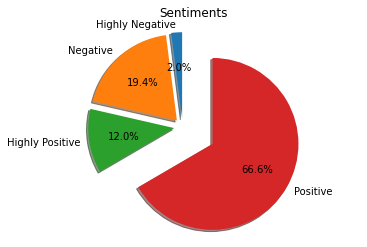

In [48]:
highly_negative=0
negative=0
neutral=0
positive=0
highly_positive=0
for tweet in all_tweets:
    analysis = TextBlob(tweet['clean_text'])
    if analysis.sentiment.polarity==0:
        neutral+=1
    elif analysis.sentiment.polarity > 0.5 and analysis.sentiment.polarity <=1:
        highly_positive+=1
    elif analysis.sentiment.polarity <= 0.5 and analysis.sentiment.polarity > 0:
        positive+=1
    elif analysis.sentiment.polarity < 0 and analysis.sentiment.polarity >= -0.5:
        negative+=1
    elif analysis.sentiment.polarity < -0.5 and analysis.sentiment.polarity >= -1:
        highly_negative+=1
        
labels = ['Highly Negative', 'Negative', 'Highly Positive', 'Positive']
sizes = [highly_negative, negative , highly_positive , positive]
explode = (0.1, 0.1, 0.1, 0.4)

fig, ax = plt.subplots()
ax.pie(sizes,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')
ax.set_title('Sentiments')


plt.show()
    
        
    


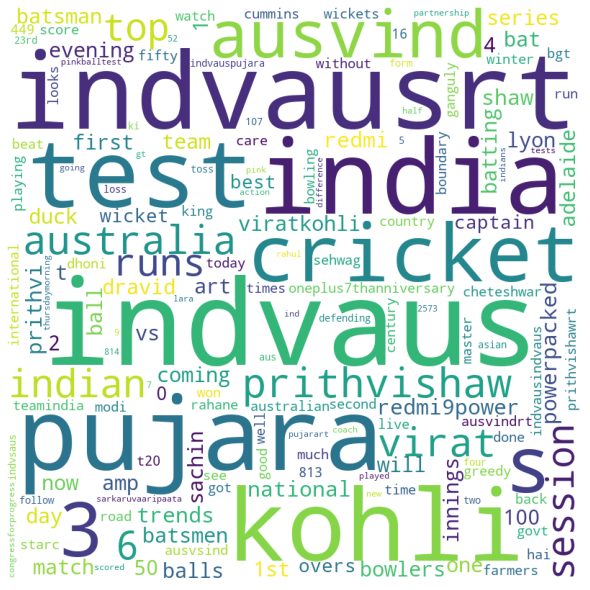

In [49]:
comment_words = ' '
stopwords = set(STOPWORDS) 
tokens = tweet_text.split()
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower()
for words in tokens: 
    if words not in stopwords: 
        comment_words = comment_words + words + ' '
counts = {}
for word in comment_words.split():
    if word in counts:
        counts[word] += 1
    else:
        counts[word] = 1
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=1000,
                relative_scaling=0.21,
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(counts)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

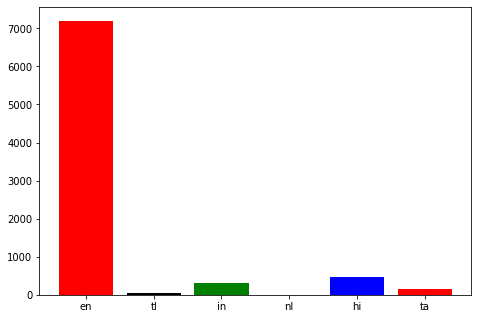

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(top_langs[:6],top_langs_numbers[:6],color=['red', 'black', 'green', 'orange', 'blue'])
plt.show()